## Predictive System for Early Detection of Heart Disease using Machine Learning Approach


Heart disease refers to a variety of conditions that affect the heart from infections to genetic defects and blood-vessel diseases.Heart disease is responsible for most deaths worldwide for both men and women of all races.

*As of 2018, 30.3 million U.S. adults were diagnosed with a heart disease. 
**On an average, a person is leading to death every 38 seconds & every 3.70 minutes because of CVD and Heart stroke respectively.Based on 2016 data, about 2,303 deaths are recorded from CVD & 389.4 deaths from a stroke each day.

*Every year, about 647,000 Americans die from heart disease, making it the leading cause of death in the United States. Heart disease causes 1 out of every 4 deathsTrusted Source.

*According to the Centers for Disease Control and Prevention (CDC)Trusted Source, approximately every 40 seconds an American will have a heart attack. Every year, 805,000 Americans have a heart attack, 605,000 of them for the first time.

*Having even one risk factor increases your odds of getting heart disease. About half of all adultsTrusted Source have at least one of three major risk factors: high blood pressure, high cholesterol, or smoking.

->These are some of the more common heart disease risks:

1.High blood pressure: High-BP , or hypertension, has long been recognized as a major risk factor for cardiovascular disease.
2.High cholesterol: Extra cholesterol can build up on artery walls and reduce blood flow to the heart.
3.Depression:Adults with a depressive disorder or symptoms of depression have a 64 percent greater risk of developing coronary artery disease.



In this notebook, I tried to unleash useful insights using the "Heart Disease" dataset and by building "Stacked -Ensemble" model by combining the power of best performing Machine-Learning algorithms.

This notebook is divided into 12 major steps which are as follows:

1. [Data description](#data-desc)
2. [Importing Libraries & setting up environment](#imp-lib)
3. [Loading dataset](#data-load)
4. [Data Cleaning & Preprocessing](#data-prep)
5. [Exploratory Data Analysis](#data-eda)
6. [Outlier Detection & Removal](#data-out)
7. [Training & Test Split](#data-train)
8. [Cross Validation & Feature Selection](#cross-val)
9. [Model Building](#data-model)
10. [Model evaluation ](#model-eval)<br>
11. [Save Model](#save-model)<br>




## 1. Dataset description<a id='data-desc'></a>

This dataset consists of 12 Features including one "Target variable". It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

**1. Age:** Patient's Age in years (Numeric).<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Nominal).<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into : 1-typical, 2 -typical angina, 3-  non-anginal pain, 4-asymptomatic (Nominal).<br>
**4. Resting Blood Pressure :** Level of blood pressure at resting mode in mm/HG (Numerical).<br>
**5. Cholestrol:** Serum cholestrol in mg/dl (Numeric).<br>
**6. Fasting Blood sugar:** Blood sugar levels on fasting > 120 mg/dl is represented as '1' ,which is True and '0' as False (Nominal).<br>
**7. Resting ECG:** Result of Electro-cardioGram while at rest are represented in 3 distinct values :0 - Normal, 1- Abnormalityin ST-T wave and 2 - Left ventricular hypertrophy (Nominal).<br>
**8. Max Heart Rate:** Maximum heart rate achieved (Numeric).<br>
**9. Exercise Angina:** Angina induced by exercise: 0 depicting 'NO' & 1 depicting as 'Yes' (Nominal).<br>
**10. Old-peak:** Exercise induced ST-depression in comparison with the state of rest (Numeric).<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise: 0-Normal,1- Upsloping, 2-Flat & 3- Downsloping (Nominal).<br>

#### Target variable
**12. Target:** It is the target variable which we have to predict '1' as "patient is suffering from heart risk" and '0' as  "patient is normal".


## 2. Importing Libraries<a id='imp-lib'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling & Pre-processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

# Model Validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# Cross Validation
from sklearn.model_selection import StratifiedKFold

# Machine-Learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 


from scipy import stats


## 3. Loading Dataset<a id='data-load'></a>

In [2]:
dt=pd.read_csv("HealthDiseaseClassfication.csv")

Lets see some of the sample entries of dataset

In [3]:
dt.head()

,Age,Sex,ChestPainType,RestingBp,Cholesterol,FastingBloodSugar,RestingEcg,MaxHeartRate,ExerciseAngina,OldPeak,ST_slope,Target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


->Lets check whether all the entries of the dataset ,fetched or not with the below 'print'.

In [4]:
print(dt.shape)

(1182, 12)


As we can see from above dataset entries ,some of the features should be nominal and to be encoded as their category type. In the next step we will be encoding features to their respective category as per the dataset description.

## 4. Data Cleaning & Preprocessing <a id='data-prep'></a>
 ->In this step we will first change the name of columns.
 ->As few columns/features naming pattern is not understandable (represented in numbers instead of names) so,we will      encode the features into categorical variables for better understanding.

In [5]:
# Renaming features to understandable names:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [6]:
### Converting features to categorical features :

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'



dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [7]:
dt['chest_pain_type'].value_counts()

asymptomatic        621
non-anginal pain    282
atypical angina     214
typical angina       65
Name: chest_pain_type, dtype: int64

In [8]:
dt['rest_ecg'].value_counts()

normal                          678
left ventricular hypertrophy    323
ST-T wave abnormality           181
Name: rest_ecg, dtype: int64

In [9]:
dt['st_slope'].value_counts()

flat           576
upsloping      524
downsloping     81
0                1
Name: st_slope, dtype: int64

In [10]:
# Dropping row with "st_slope =0" :
dt.drop(dt[dt.st_slope ==0].index, inplace=True)
# Checking distribution
dt['st_slope'].value_counts()

flat           576
upsloping      524
downsloping     81
Name: st_slope, dtype: int64

In [11]:
# Checking the top 5 entries of dataset after feature encoding:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


->As we can see features are encoded sucessfully to their respective categories,in the next step we will be checking if there are any missing entries or not ?

In [12]:
## Checking column-wise missing entries in the dataset :
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1181
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1181 non-null   int64  
 1   sex                      1181 non-null   object 
 2   chest_pain_type          1181 non-null   object 
 3   resting_blood_pressure   1181 non-null   int64  
 4   cholesterol              1181 non-null   int64  
 5   fasting_blood_sugar      1181 non-null   int64  
 6   rest_ecg                 1181 non-null   object 
 7   max_heart_rate_achieved  1181 non-null   int64  
 8   exercise_induced_angina  1181 non-null   int64  
 9   st_depression            1181 non-null   float64
 10  st_slope                 1181 non-null   object 
 11  target                   1181 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 119.9+ KB


So, there are no missing entries in the dataset . Next we will move towards exploring the dataset by performing detailed EDA.

## 5. Exploratory Data Analysis (EDA) <a id='data-eda'></a>

In [14]:
# First checking the shape of the dataset:
dt.shape

(1181, 12)

->So, there are total 1181 records and 12 features with 1 target variable. Now lets check the summary of numerical and categorical features.

In [15]:
# Summary statistics of numerical columns:
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000
mean,53.714649,132.122777,210.469941,0.212532,139.729043,0.388654,0.923878,0.526672
std,9.350738,18.387708,101.737408,0.409272,25.489501,0.487651,1.086491,0.499500
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [16]:
#dt.describe(include='all')

As we can see from above description resting_blood_pressure and cholestrol have some outliers as they have minimum value of 0 whereas cholestrol has outlier on upper side as 603 ,where as "resting_blood_pressure"have maximum value of 200.

In [17]:
# Summary statistics of categorical columns:
dt.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1181,1181,1181,1181
unique,2,4,3,3
top,male,asymptomatic,normal,flat
freq,902,621,677,576


### a.Distribution of Heart Disease (target variable)

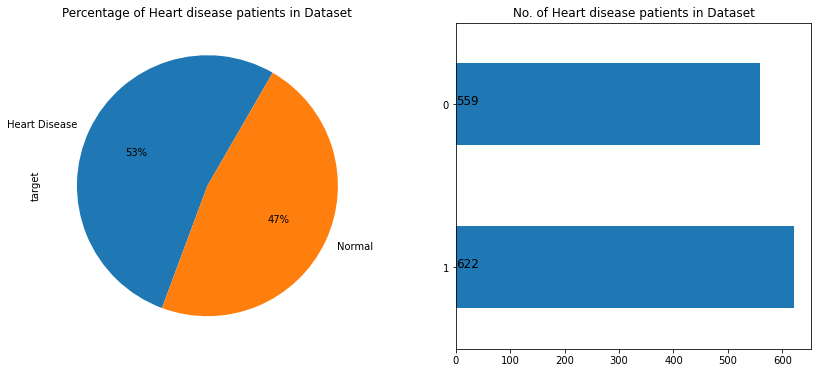

In [18]:

# Plotting attrition of employees:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced(negligible difference) ,since we have 622 Heart disease patients and 559 Normal patients.

### b.Checking Gender & Agewise Distribution

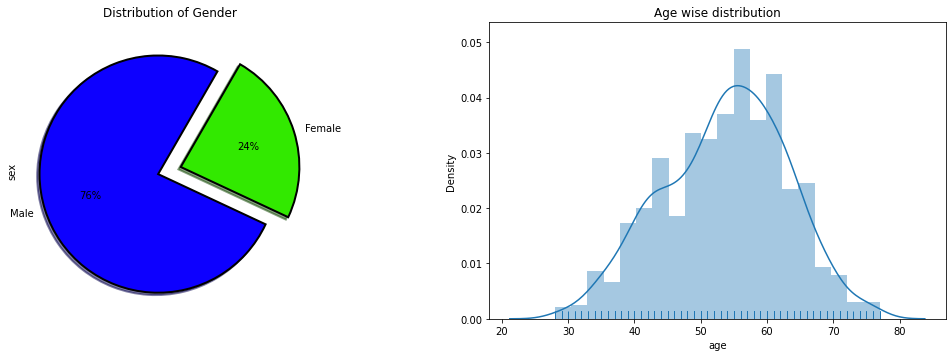

In [19]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

->As we can see from above plot, percentage of distribution of the gender 'Male' is way higher than 'Female'. 
->Where as average age of patients(both and Male & Female) is around 55.

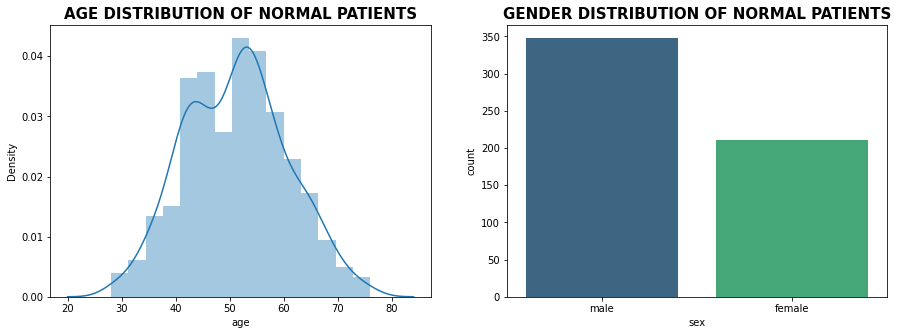

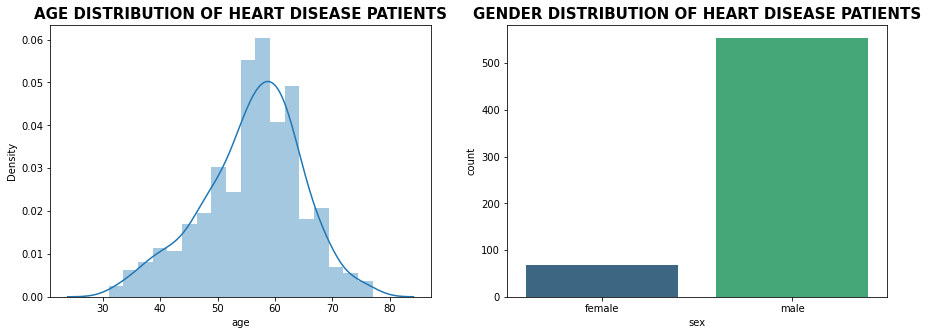

In [20]:
# Creating separate df for normal and heart patients:

attr_1=dt[dt['target']==1]

attr_0=dt[dt['target']==0]

# Plotting normal patients:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

# Plotting heart patients:

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

->As we can see from above plot, 'Male' patients are more prone to heart disease when compared to 'Female'. 
->whereas Mean/Average age of heart disease patients is between 50 to 60 years.

### c.Distribution of Chest Pain Type

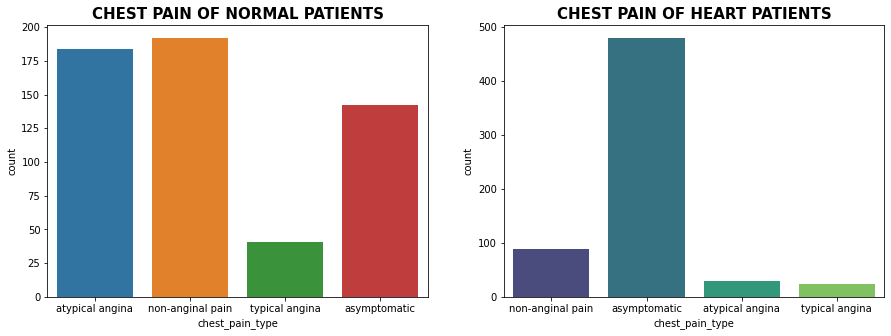

In [21]:
# Plotting normal patients:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

# Plotting heart patients:
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [22]:
#Exploring the Heart Disease patients based on Chest Pain Type:
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.400000,77.010000
atypical angina,32.920000,4.820000
non-anginal pain,34.350000,14.310000
typical angina,7.330000,3.860000


->As we can see from above plot, **77%** of the "chest pain type" of the heart disease patients have asymptomatic chest pain. 

->Asymptomatic heart attacks medically known as **Silent Myocardial Infarction (SMI)** annually accounts for around 45-50% of morbidities due to cardiac ailments and even premature deaths in India. The incidences among middle aged people experiencing SMI is twice likely to develop in males than females. The symptoms of SMI being very mild in comparison to an actual heart attack; it is described as a silent killer. Unlike the symptoms in a normal heart attack which includes extreme chest pain, stabbing pain in the arms, neck & jaw, sudden shortness of breath, sweating and dizziness, the symptoms of SMI are very brief and hence confused with regular discomfort and most often ignored.

[reference](https://www.maxhealthcare.in/blogs/cardiology/rise-cases-asymptomatic-heart-attacks-amongst-middle-aged-people)



### d.Distribution of Rest ECG

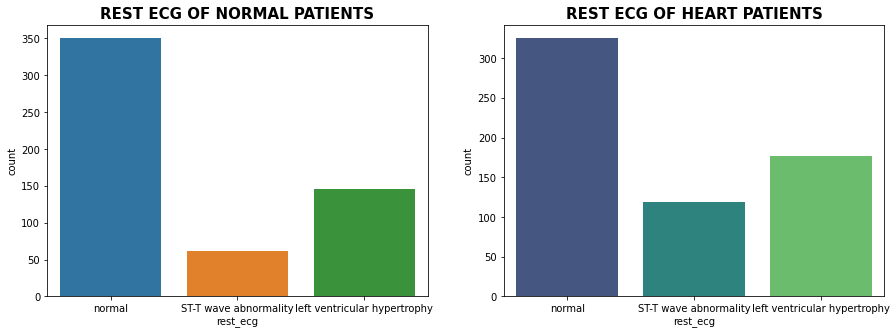

In [23]:
# Plotting normal patients:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

# Plotting heart patients:
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'], palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [24]:
#Exploring the "Heart Disease Patients" based on REST ECG:
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.090000,19.130000
left ventricular hypertrophy,26.120000,28.460000
normal,62.790000,52.410000


![](https://cdn.britannica.com/95/26995-050-2E4087CF/deflections-Electrocardiogram-contractions-heart-heartbeat-atria-ventricles.jpg)
->An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs. but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 52% heart disease patients have normal ECG

### e.Distribution of St_Slope

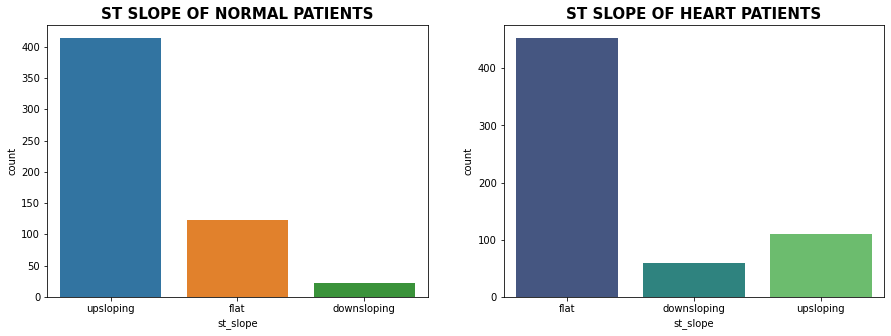

In [25]:
# Plotting Normal Patients:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

# Plotting Heart Patients:
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [26]:
#Exploring the "Heart Disease Patients" based on "ST Slope":

plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.940000,9.490000
flat,22.000000,72.830000
upsloping,74.060000,17.680000




->The ST segment /heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) in most of the research papers. 

->As we can see from above plot 'upsloping'  74% for the normal patients ,while heart patients have flat sloping as 72.83%,which is a good test/analysis for different heart diseases.

### e.Distribution of Numerical features

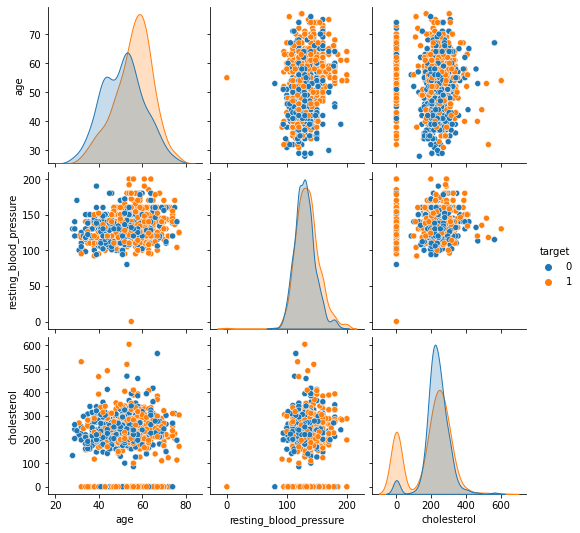

In [27]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

->From the above plot it is clear that as the age increases, chances of Heart Disease increases.

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

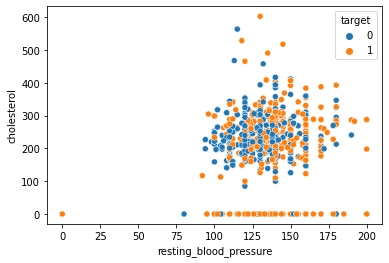

In [28]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

->From the above plot we can see outliers clearly.
 ->For a patient 'cholestrol' is 0 and 'resting bp' is  also 0 in the plot ,which is may be due to the missing entries. We will filter these ouliers later.

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

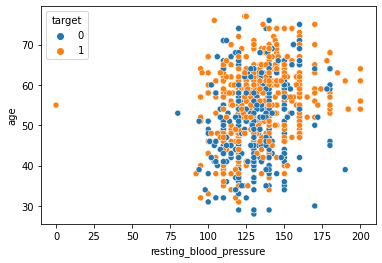

In [29]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

## 6. Outlier Detection & Removal <a id='data-out'></a>

In [30]:
#  As per EDA , Filtering numeric features ("age" , "resting bp", "cholestrol" and "max heart rate achieved" ) that has outliers:

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [31]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [32]:
# Calculating Z-score of numeric columns of the dataset:
z = np.abs(stats.zscore(dt_numeric))
print(z)

[[1.46731291 0.42857761 0.77221672 1.26658534]
 [0.50441429 1.51672155 0.29962282 0.63860999]
 [1.78827912 0.11549436 0.71321638 1.63780065]
 ...
 [1.03935797 0.65956634 0.40779011 0.16762847]
 [0.993428   0.42857761 0.23078909 0.16762847]
 [0.993428   0.44193755 0.13245518 0.1463592 ]]


->From the above output it is diffciult to say which points are outliers ,so we will now define a threshold to filter the outliers.

In [33]:
# Defining threshold for filtering outliers :
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


->The first array contains the list of row numbers and second array has their respective column numbers, which means z[30][2] have a Z-score higher than 3. There are total 17 data points which are outliers.

In [34]:
# Filtering outliers ,retaining only those data points which are below threshold:
dt = dt[(z < 3).all(axis=1)]

In [35]:
# Checking shape of dataset after outlier removal:
dt.shape

(1164, 12)

In [36]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


All the 17 data points which are outliers are now removed.

->Now before splitting dataset into train and test we first encode categorical variables as dummy variables and segregate features and target variable.

In [37]:
## Encoding categorical variables:
dt= pd.get_dummies(dt, drop_first=True)

dt.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [38]:
# checking the shape of dataset
dt.shape

(1164, 16)

In [39]:
dt['target']

0       0
1       1
2       0
3       1
4       0
       ..
1177    1
1178    0
1179    1
1180    1
1181    1
Name: target, Length: 1164, dtype: int64

In [40]:
dt['target'].value_counts()

1    608
0    556
Name: target, dtype: int64

In [41]:
dt.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,1


In [42]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

In [43]:
X.shape

(1164, 15)

In [44]:
X.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,1,1,0,0,0,1,0,1
1,49,160,180,0,156,0,1.0,0,0,1,0,0,1,1,0
2,37,130,283,0,98,0,0.0,1,1,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,0,0,0,0,0,1,1,0
4,54,150,195,0,122,0,0.0,1,0,1,0,0,1,0,1


## 7. Train Test Split <a id='data-train'></a>

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [46]:
print('Training Set')
print(X_train.shape)
print(y_train.shape)

print('Test Set')
print(X_test.shape)
print(y_test.shape)

Training Set
(931, 15)
(931,)
Test Set
(233, 15)
(233,)


## 8.Checking Correlation & Feature Importance  <a id='data-corr'></a>

In [47]:
### constant features check and removal if any: 
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [48]:
constant_filter.get_support().sum()

15

In [49]:
constant_list=[not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [50]:
corrmat= X_train.corr()

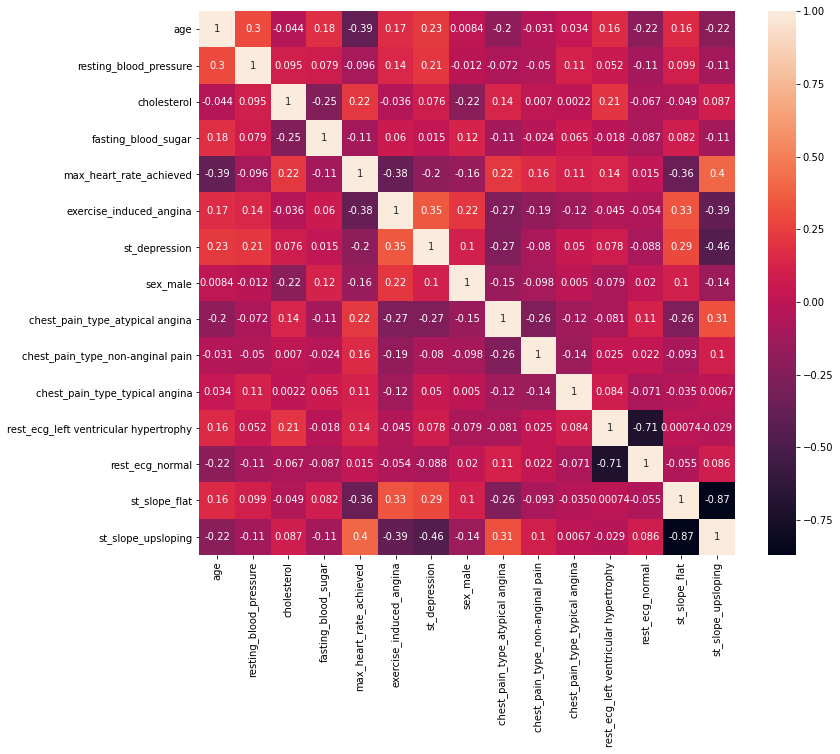

In [51]:

plt.figure(figsize=(12,10))

dataplot=sns.heatmap((corrmat),annot= True ) 
plt.show()

In [52]:
def get_correlation(da ,threshold):
    corr_col= set()
    corrmat= dt.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
                
   
    return corr_col            
          
            

In [53]:
corr_features=get_correlation(X_train,0.85)
corr_features

{'st_slope_upsloping'}

In [54]:
len(corr_features)

1

In [55]:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr= X_test.drop(labels=corr_features,axis=1)

In [56]:
X_train_uncorr.shape,X_test_uncorr.shape

((931, 14), (233, 14))

In [57]:
#Feature grouping and feature importance:
#vertical stacking
corrmat

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
age,1.000000,0.295397,-0.043804,0.182618,-0.385685,0.170494,0.232402,0.008408,-0.196314,-0.030751,0.034001,0.156359,-0.218489,0.159661,-0.219602
resting_blood_pressure,0.295397,1.000000,0.094999,0.079459,-0.095964,0.144902,0.214355,-0.011591,-0.072053,-0.049703,0.114118,0.051903,-0.106202,0.099440,-0.111427
cholesterol,-0.043804,0.094999,1.000000,-0.250949,0.220612,-0.036225,0.076394,-0.219709,0.135442,0.007001,0.002193,0.207572,-0.067064,-0.048886,0.087193
fasting_blood_sugar,0.182618,0.079459,-0.250949,1.000000,-0.113114,0.059847,0.014821,0.118245,-0.106106,-0.024070,0.064888,-0.018417,-0.087126,0.082097,-0.113723
max_heart_rate_achieved,-0.385685,-0.095964,0.220612,-0.113114,1.000000,-0.377131,-0.198328,-0.157695,0.218797,0.155283,0.110338,0.135820,0.014667,-0.361461,0.400743
exercise_induced_angina,0.170494,0.144902,-0.036225,0.059847,-0.377131,1.000000,0.349669,0.215385,-0.268919,-0.186147,-0.124691,-0.045449,-0.053894,0.333848,-0.389105
st_depression,0.232402,0.214355,0.076394,0.014821,-0.198328,0.349669,1.000000,0.102623,-0.269165,-0.080328,0.050401,0.078094,-0.088478,0.287681,-0.460649
sex_male,0.008408,-0.011591,-0.219709,0.118245,-0.157695,0.215385,0.102623,1.000000,-0.150234,-0.097807,0.005006,-0.078716,0.019820,0.102153,-0.141131
chest_pain_type_atypical angina,-0.196314,-0.072053,0.135442,-0.106106,0.218797,-0.268919,-0.269165,-0.150234,1.000000,-0.264476,-0.119570,-0.081464,0.110941,-0.264018,0.314608
chest_pain_type_non-anginal pain,-0.030751,-0.049703,0.007001,-0.024070,0.155283,-0.186147,-0.080328,-0.097807,-0.264476,1.000000,-0.141561,0.024813,0.021897,-0.092587,0.100547


In [58]:
corrdata=corrmat.abs().stack()
corrdata

age                 age                                      1.000000
                    resting_blood_pressure                   0.295397
                    cholesterol                              0.043804
                    fasting_blood_sugar                      0.182618
                    max_heart_rate_achieved                  0.385685
                                                               ...   
st_slope_upsloping  chest_pain_type_typical angina           0.006689
                    rest_ecg_left ventricular hypertrophy    0.029263
                    rest_ecg_normal                          0.085786
                    st_slope_flat                            0.869382
                    st_slope_upsloping                       1.000000
Length: 225, dtype: float64

In [59]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

age                                    age                                      1.000000
resting_blood_pressure                 resting_blood_pressure                   1.000000
st_slope_flat                          st_slope_flat                            1.000000
rest_ecg_normal                        rest_ecg_normal                          1.000000
rest_ecg_left ventricular hypertrophy  rest_ecg_left ventricular hypertrophy    1.000000
                                                                                  ...   
chest_pain_type_typical angina         sex_male                                 0.005006
cholesterol                            chest_pain_type_typical angina           0.002193
chest_pain_type_typical angina         cholesterol                              0.002193
rest_ecg_left ventricular hypertrophy  st_slope_flat                            0.000744
st_slope_flat                          rest_ecg_left ventricular hypertrophy    0.000744
Length: 225, dtype: f

In [60]:
corrdata=corrdata[corrdata>0.85]
corrdata=corrdata[corrdata<1]
corrdata


st_slope_upsloping  st_slope_flat         0.869382
st_slope_flat       st_slope_upsloping    0.869382
dtype: float64

In [61]:
corrdata=pd.DataFrame(corrdata).reset_index()
corrdata.columns=['features1','features2','corr_values']
corrdata


,features1,features2,corr_values
0,st_slope_upsloping,st_slope_flat,0.869382
1,st_slope_flat,st_slope_upsloping,0.869382


In [62]:
#Grouping of these corelated features and finding  feature imp for each group,will select only one feature from each group and discard other feature.
#creating a list for group fetaure list
grouped_feature_list=[]
correlated_groups_list=[]
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block=corrdata[corrdata.features1==feature]
        grouped_feature_list=grouped_feature_list+list(correlated_block.features2.unique())+[feature]
        correlated_groups_list.append(correlated_block)

In [63]:
len(correlated_groups_list)


1

In [64]:
correlated_groups_list

[            features1      features2  corr_values
 0  st_slope_upsloping  st_slope_flat     0.869382]

In [65]:
X_train.shape,X_train_uncorr.shape


((931, 15), (931, 14))

In [66]:
#feature importance based on tree based classifiers:
important_features=[]
for group in correlated_groups_list:
    features=list(group.features1.unique())+list(group.features2.unique())
    rf= RandomForestClassifier(n_estimators=100,random_state=0)
    rf.fit(X_train[features],y_train)
    
    importance=pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
    importance.columns=['features','importance']
    importance.sort_values(by='importance',ascending=False,inplace=True)
    feat1=importance.iloc[0]
    important_features.append(feat1)
    
    


In [67]:
important_features


[features      st_slope_upsloping
 importance              0.586961
 Name: 0, dtype: object]

In [68]:
important_features_et=[]
for group in correlated_groups_list:
    features=list(group.features1.unique())+list(group.features2.unique())
    et= ExtraTreesClassifier(n_estimators=100,random_state=0)
    et.fit(X_train[features],y_train)
    
    importance=pd.concat([pd.Series(features),pd.Series(et.feature_importances_)],axis=1)
    importance.columns=['features','importance']
    importance.sort_values(by='importance',ascending=False,inplace=True)
    feat2=importance.iloc[0]
    important_features_et.append(feat2)

In [69]:
important_features_et

[features      st_slope_upsloping
 importance              0.584409
 Name: 0, dtype: object]

In [70]:
important_features=pd.DataFrame(important_features)

In [71]:
important_features.reset_index(inplace=True,drop=True)

In [72]:
## Checking distribution of target variable in train test split:
print('Distribution of target variable in training set:')
print(y_train.value_counts())

print('Distribution of target variable in test set:')
print(y_test.value_counts())

Distribution of target variable in training set:
1    486
0    445
Name: target, dtype: int64
Distribution of target variable in test set:
1    122
0    111
Name: target, dtype: int64


In [73]:
print(X_test_uncorr.shape)


(233, 14)


In [74]:
important_features

,features,importance
0,st_slope_upsloping,0.586961


In [75]:
features_to_consider = set(important_features['features'])

In [76]:
features_to_discard=set(corr_features)- set(features_to_consider)

In [77]:
#list for features to be discarded
features_to_discard=list(features_to_discard)

In [78]:
X_train_grouped_uncorr=X_train.drop(labels=features_to_discard,axis=1)
X_train_grouped_uncorr.shape

(931, 15)

In [79]:
X_test_grouped_uncorr=X_test.drop(labels=features_to_discard,axis=1)
X_test_grouped_uncorr.shape

(233, 15)

In [80]:
print('Training Set')
print(X_test_grouped_uncorr.shape)
print(y_train.shape)

print('Test Set')
print(X_test_grouped_uncorr.shape)
print(y_test.shape)

Training Set
(233, 15)
(931,)
Test Set
(233, 15)
(233,)


In [81]:
X_train_grouped_uncorr.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1016,62,124,209,0,163,0,0.0,0,0,0,0,0,1,0,1
627,59,135,234,0,161,0,0.5,1,0,0,0,0,1,1,0
929,71,160,302,0,162,0,0.4,0,1,0,0,0,1,0,1
482,69,140,0,1,118,0,2.5,1,0,1,0,0,0,0,0
253,61,125,292,0,115,1,0.0,1,0,0,0,0,0,0,1


### a.Feature normalization
In this step we will normalize all the numeric features in the range of 0 to 1

In [82]:


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate_achieved','st_depression','resting_blood_pressure']] = scaler.fit_transform(X_train[['age','cholesterol','max_heart_rate_achieved','st_depression','resting_blood_pressure']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1016,0.693878,0.344086,0.425662,0,0.711111,0,0.295455,0,0,0,0,0,1,0,1
627,0.632653,0.462366,0.476578,0,0.696296,0,0.352273,1,0,0,0,0,1,1,0
929,0.877551,0.731183,0.615071,0,0.703704,0,0.340909,0,1,0,0,0,1,0,1
482,0.836735,0.516129,0.000000,1,0.377778,0,0.579545,1,0,1,0,0,0,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.295455,1,0,0,0,0,0,0,1


In [83]:
X_test[['age','cholesterol','max_heart_rate_achieved','st_depression','resting_blood_pressure']] = scaler.transform(X_test[['age','cholesterol','max_heart_rate_achieved','st_depression','resting_blood_pressure']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1112,0.122449,0.279570,0.427699,0,0.925926,0,0.375000,0,1,0,0,0,1,0,1
25,0.163265,0.408602,0.425662,0,0.822222,0,0.295455,1,0,1,0,0,1,0,1
561,0.530612,0.440860,0.413442,0,0.518519,0,0.318182,1,0,1,0,0,0,0,1
390,0.673469,0.731183,0.000000,1,0.577778,0,0.409091,1,0,0,0,0,0,1,0
967,0.346939,0.129032,0.423625,0,0.600000,1,0.636364,1,0,0,0,1,0,1,0


## 8. Cross Validation  <a id='cross-val'></a>

In this step, we will build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used in level 0(base models) of stacked ensemble method.

In [84]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# function initializing baseline machine learning models
#Return statement is used to end the execution of the function call and returns the result to the caller i.e., 
#value of the expression following the return keyword.
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Ent500'   , RandomForestClassifier(criterion='entropy',n_estimators=500)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10 ,random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [85]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.851796 (0.022265)
KNN7: 0.847518 (0.028888)
KNN5: 0.845356 (0.022424)
KNN9: 0.845379 (0.033416)
KNN11: 0.846442 (0.028187)
CART: 0.861370 (0.039330)
NB: 0.848536 (0.020180)
SVM Linear: 0.843205 (0.021387)
SVM RBF: 0.847518 (0.028888)
AB: 0.853969 (0.024223)
GBM: 0.882887 (0.024378)
RF_Ent100: 0.924800 (0.031557)
RF_Ent500: 0.928026 (0.024565)
RF_Gini100: 0.930188 (0.017481)
ET100: 0.916198 (0.019778)
ET500: 0.918348 (0.021668)
MLP: 0.865763 (0.026278)
[23:58:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:58:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like 

[23:59:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB_100: 0.919412 (0.032395)
[23:59:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation m

## 9. Model building <a id='data-model'></a>

### Random Forest Classifier (criterion = 'entropy')

In [86]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=200)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [87]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [88]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=100)

In [89]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

### Extra Tree Classifier (n_estimators=500)

In [90]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et_500 = et_500.predict(X_test)

### XGBoost (n_estimators=500)

In [91]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500,eval_metric='mlogloss')
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier (kernel='linear')

In [92]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Adaboost Classifier

In [93]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### decision Tree Classifier 

In [94]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### gradient boosting machine 

In [95]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

## 10. Model Evaluation   <a id='model-eval'></a>

 In this step we will first define which evaluation metrics we will use to evaluate our model. The most important evaluation metric for this problem domain is **sensitivity, specificity, Precision, F1-measure, Geometric mean and mathew correlation coefficient and finally ROC AUC curve**
 

              precision    recall  f1-score   support

           0       0.97      0.85      0.90       111
           1       0.88      0.98      0.92       122

    accuracy                           0.91       233
   macro avg       0.92      0.91      0.91       233
weighted avg       0.92      0.91      0.91       233

[[ 94  17]
 [  3 119]]


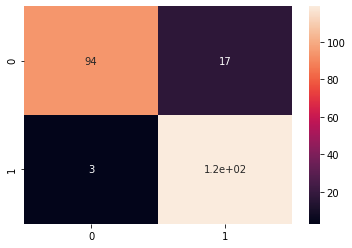

In [96]:
CM=confusion_matrix(y_test,y_pred_et_100)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_et_100)
acc= accuracy_score(y_test, y_pred_et_100)
roc=roc_auc_score(y_test, y_pred_et_100)
prec = precision_score(y_test, y_pred_et_100)
rec = recall_score(y_test, y_pred_et_100)
f1 = f1_score(y_test, y_pred_et_100)

mathew = matthews_corrcoef(y_test, y_pred_et_100)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results
print(classification_report(y_test,y_pred_et_100))
print(confusion_matrix(y_test,y_pred_et_100))

## a.Comparison with other Models

In [97]:
data = {        'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et_100,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                'Adaboost': y_pred_ada, 
                'DT': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.914163,0.875000,0.975410,0.846847,0.922481,0.911128,2.964760,0.833093
1,MLP,0.836910,0.804348,0.909836,0.756757,0.853846,0.833296,5.633026,0.677487
2,KNN,0.828326,0.792857,0.909836,0.738739,0.847328,0.824287,5.929503,0.661448
3,EXtra tree classifier,0.914163,0.875000,0.975410,0.846847,0.922481,0.911128,2.964760,0.833093
4,XGB,0.905579,0.873134,0.959016,0.846847,0.914062,0.902932,3.261230,0.814203
5,SVC,0.841202,0.810219,0.909836,0.765766,0.857143,0.837801,5.484788,0.685546
6,Adaboost,0.841202,0.819549,0.893443,0.783784,0.854902,0.838613,5.484781,0.683360
7,DT,0.879828,0.879032,0.893443,0.864865,0.886179,0.879154,4.150634,0.759036
8,GBM,0.858369,0.839695,0.901639,0.810811,0.869565,0.856225,4.891830,0.717233



### Findings of Test data:
-> AS we can see from above results, 'Extra Tree' & 'Random Forest' are the best performers ,as it has the highest "Test Accuracy" of 0.914.Where as sensitivity as 0.975 for Random , specificity as 0.84 ,f1-score as 0.922(Highest) and  with lowest "Log Loss" of 2.96.


### b.ROC AUC Curve

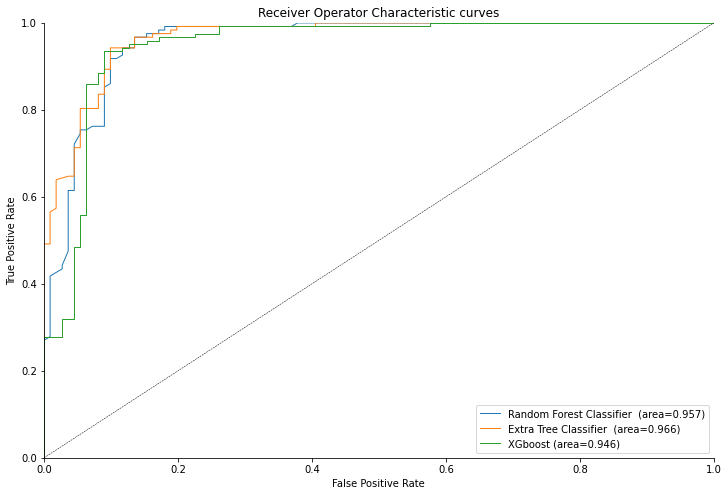

In [98]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

->As we can see the highest "Average-area Under the Curve (AUC)" is 0.966 which is attained by Extra Tree Classifier.

## c.Precision Recall curve

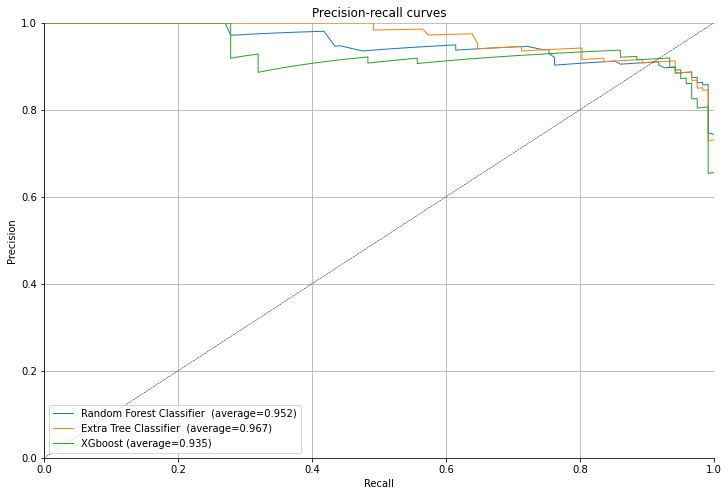

In [99]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(12,8))

precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',)
        
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

## 11.Save Model  <a id='save-model'></a>

In [100]:
##Pickle


import pickle

# open a file, where you ant to store the data
file = open('heart_disease_detection.pkl', 'wb')

# dump information to that file
pickle.dump(et_100, file)

